                                 Decision Tree Classification First Project 

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
# load dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
feat_colums = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feat_colums]
y = diabetes.Outcome

In [3]:
#Divinding the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
#Creating Tree Object With Entropy Criterias
model = tree.DecisionTreeClassifier(criterion='entropy')


In [5]:
#Decision Tree Classifier
model = model.fit(X_train,y_train)

In [6]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Using Entropy Criterion:",metrics.accuracy_score(y_test, y_pred))

Accuracy Using Entropy Criterion: 0.7077922077922078


In [8]:
#Improving Model Accuracy By Trying Maximum Depth Of Node
model = tree.DecisionTreeClassifier(max_depth = 5)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy Using Entropy Criterion:",metrics.accuracy_score(y_test, y_pred))
metrics.accuracy_score(y_test, y_pred)


Accuracy Using Entropy Criterion: 0.7402597402597403


0.7402597402597403

In [9]:
#Improving Model Accuracy By Trying Maximum Depth Of Node
model = tree.DecisionTreeClassifier(max_depth = 5)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy Using Entropy Criterion:",metrics.accuracy_score(y_test, y_pred))

Accuracy Using Entropy Criterion: 0.7337662337662337


As can be seen that model has been optimised by trimming the depth of tree at 4

C:\Users\Trilo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


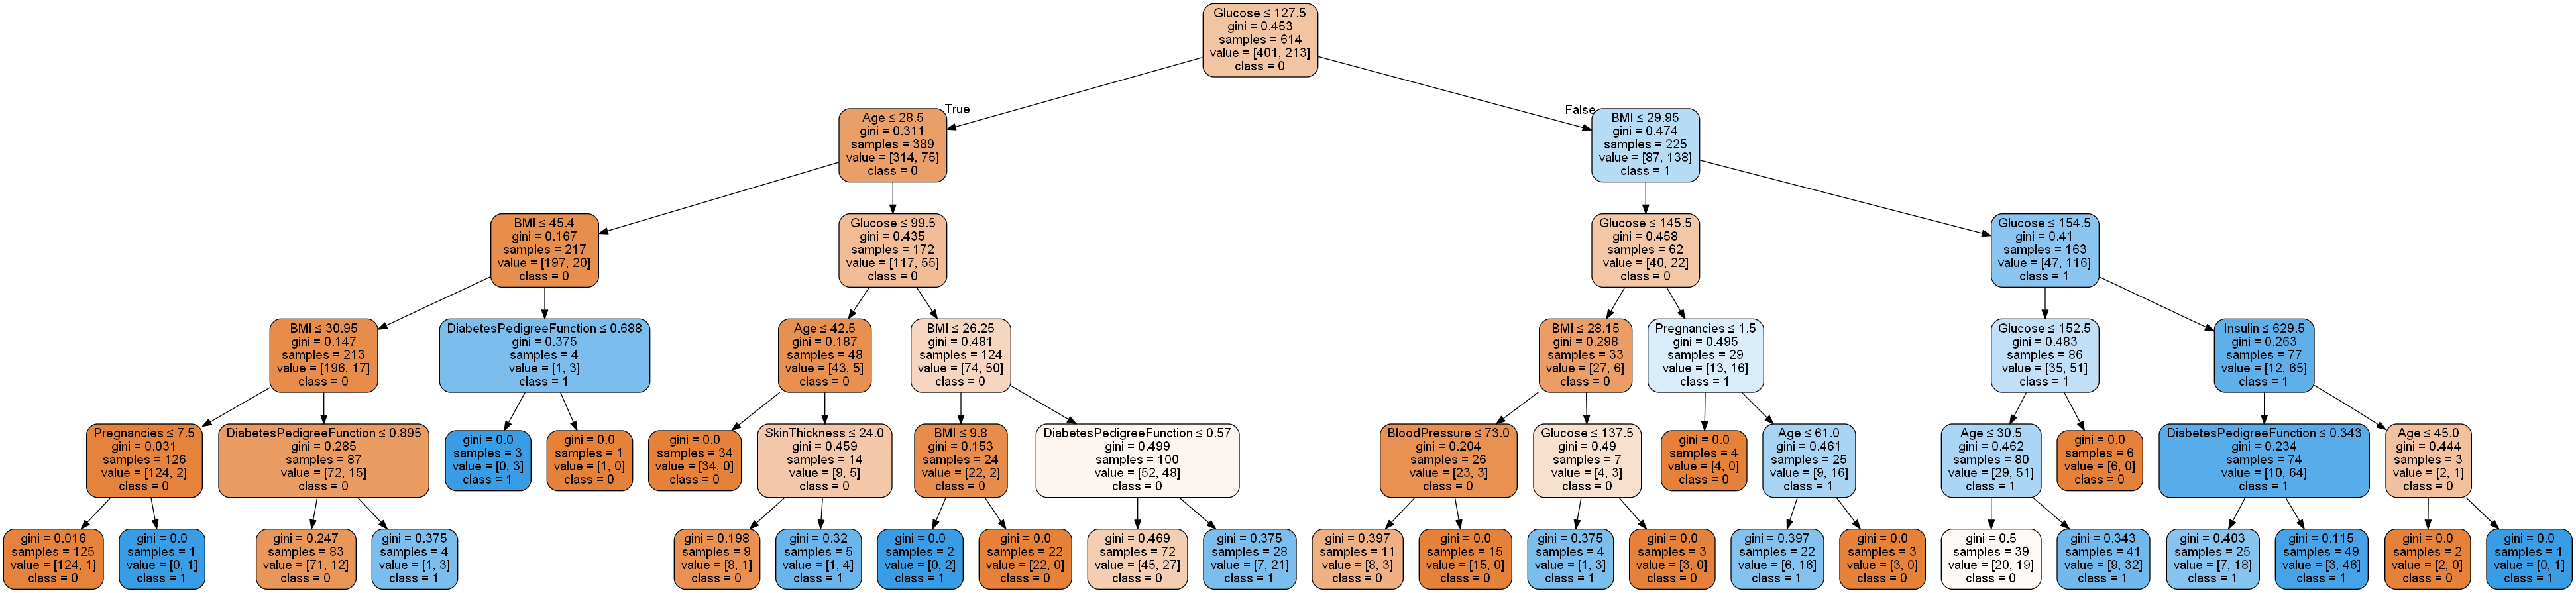

In [10]:
#Plotting The Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feat_colums,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())